# Prediction Preprocessing - Gaining Dommain Knowledge 

Nichole Eienne 


CS 534 

FInal Project 

In [23]:
#import libraries 
import os
import re
import ast
import mne
import numpy as np
import scipy.io as sio
from pathlib import Path
from getpass import getpass
import matplotlib.pyplot as plt

Load in the data 

In [24]:
#load data 
Data_dir = Path("/Volumes/LaCie/seizure-prediction/Dog_1/Dog_1")

Ensure that the files within the a specific directory: example Dog1 can be viewed by displaying 20 files 

In [25]:
#display top 20 files 
os.listdir(Data_dir)[:20]

['Dog_1_interictal_segment_0001.mat',
 'Dog_1_interictal_segment_0002.mat',
 'Dog_1_interictal_segment_0003.mat',
 'Dog_1_interictal_segment_0004.mat',
 'Dog_1_interictal_segment_0005.mat',
 'Dog_1_interictal_segment_0006.mat',
 'Dog_1_interictal_segment_0007.mat',
 'Dog_1_interictal_segment_0008.mat',
 'Dog_1_interictal_segment_0009.mat',
 'Dog_1_interictal_segment_0010.mat',
 'Dog_1_interictal_segment_0011.mat',
 'Dog_1_interictal_segment_0012.mat',
 'Dog_1_interictal_segment_0013.mat',
 'Dog_1_interictal_segment_0014.mat',
 'Dog_1_interictal_segment_0015.mat',
 'Dog_1_interictal_segment_0016.mat',
 'Dog_1_interictal_segment_0017.mat',
 'Dog_1_interictal_segment_0018.mat',
 'Dog_1_interictal_segment_0019.mat',
 'Dog_1_interictal_segment_0020.mat']

# Exploring of the first dog 

The purpose of this process is to understand the data for further processing 

In [26]:
#Dog_1_interictal_segment_0001.mat exploration

filename = "Dog_1_interictal_segment_0001.mat"
path = ("/Volumes/LaCie/seizure-prediction/Dog_1/Dog_1/Dog_1_interictal_segment_0001.mat")
mat = sio.loadmat(path)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 21 01:00:00 2014',
 '__version__': '1.0',
 '__globals__': [],
 'interictal_segment_1': array([[(array([[  0,  13,  15, ..., -25, -21, -12],
                [-26,  -4,  11, ..., -39, -32, -21],
                [-42, -35, -19, ..., -16, -16, -18],
                ...,
                [ 45,  30,  25, ...,  43,  28,  17],
                [ 15,   8,  -6, ...,  14,  13,   6],
                [-18, -20, -19, ...,   9,   9,   3]], dtype=int16), array([[600]], dtype=uint16), array([[399.6097561]]), array([[array(['NVC1202_32_002_Ecog_c001'], dtype='<U24'),
                 array(['NVC1202_32_002_Ecog_c002'], dtype='<U24'),
                 array(['NVC1202_32_002_Ecog_c003'], dtype='<U24'),
                 array(['NVC1202_32_002_Ecog_c004'], dtype='<U24'),
                 array(['NVC1202_32_002_Ecog_c005'], dtype='<U24'),
                 array(['NVC1202_32_002_Ecog_c006'], dtype='<U24'),
                 array(['NVC12

Parsing the data requires a series of functions: 
'get_data : returns the a channel by time matrix that represent the EEG signal ( millionths of a volt)'
'get_data_length_sec: duration of each EGG data row'
'get_sampling_frequency: the sampling frequency '
'get_channels: names of electrodes' 
'get_sequence:The index Index of data segment within one hour series of the clips '

In [29]:
#This functions were created for the purpose of parsing data 

def get_data(mat):
    'returns the a channel by time matrix that represent the EEG signal ( millionths of a volt)'
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    return segment['data'][0][0]

def get_data_length_sec(mat):
    'duration of each EGG data row'
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    return segment['data_length_sec'][0][0][0][0]

def get_sampling_frequency(mat):
    'returns the frequency: the sampling frequency'
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    return segment['sampling_frequency'][0][0][0][0]

def get_channels(mat):
      'returns the names of electrodes'
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    return segment['channels'][0][0][0]

def get_sequence(mat):
    'returns the index Index of data segment within one hour series of the clips '
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    return segment['sequence'][0][0][0][0]


In [33]:
#print statement for each function mentioned above 
data = get_data(mat)
print('The Matrix Diemension of EEG Data (electrode, time):', data.shape)

data_length_sec = get_data_length_sec(mat)
print('Duration (Time) of each EEG data row (s):', data_length_sec)

sampling_frequency = get_sampling_frequency(mat)
print('The sampling frequency: ', sampling_frequency)

channels = get_channels(mat)
print('EEG Channels :', channels)

sequence = get_sequence(mat)
print('Data segment index in 10 min clips series :', sequence)


Matrix Diemension of EEG Data (electrode, time): (16, 239766)
Duration (Time) of each EEG data row (s): 600
The sampling frequency:  399.609756097561
EEG Channels : [array(['NVC1202_32_002_Ecog_c001'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c002'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c003'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c004'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c005'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c006'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c007'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c008'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c009'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c010'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c011'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c012'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c013'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c014'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c015'], dtype='<U24')
 array(['NVC1202_32_002_Ecog_c016'], dtype='<U24')]
Data segment index

Functions are also defined to get the file count of interictal and is_preictal within a specific patient( dog or human) The example below is one of a dog. The function names are self explanatory of their processes. 

In [37]:
def is_interictal(name):
    return 'interictal' in name

def get_interictal_file_count(directory_path):
    interictal_filter = filter(is_interictal, os.listdir(directory_path))
    interictals = [interictal for interictal in interictal_filter]
    return len(interictals)

def is_preictal(name):
    return 'preictal' in name

def get_preictal_file_count(directory_path):
    preictal_filter = filter(is_preictal, os.listdir(directory_path))
    preictals = [preictal for preictal in preictal_filter]
    return len(preictals)

print('The Interictal file count:', get_interictal_file_count(Data_dir))
print('The Preictal file count:', get_preictal_file_count(Data_dir))

The Interictal file count: 960
The Preictal file count: 48


Now that the count of Interictal and Preictal have been established, it can be plotted below

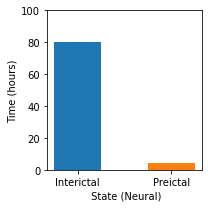

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3,3))
ax.bar('Interictal', 80, width=0.5)
ax.bar('Preictal', 4, width=0.5)
ax.set_xlabel(' State (Neural)')
ax.set_ylabel('Time (hours)')
ax.set_ylim([0,100])

fig.tight_layout()
fig.savefig('/Volumes/LaCie/dog1_classes.png')

Preictal signals view 

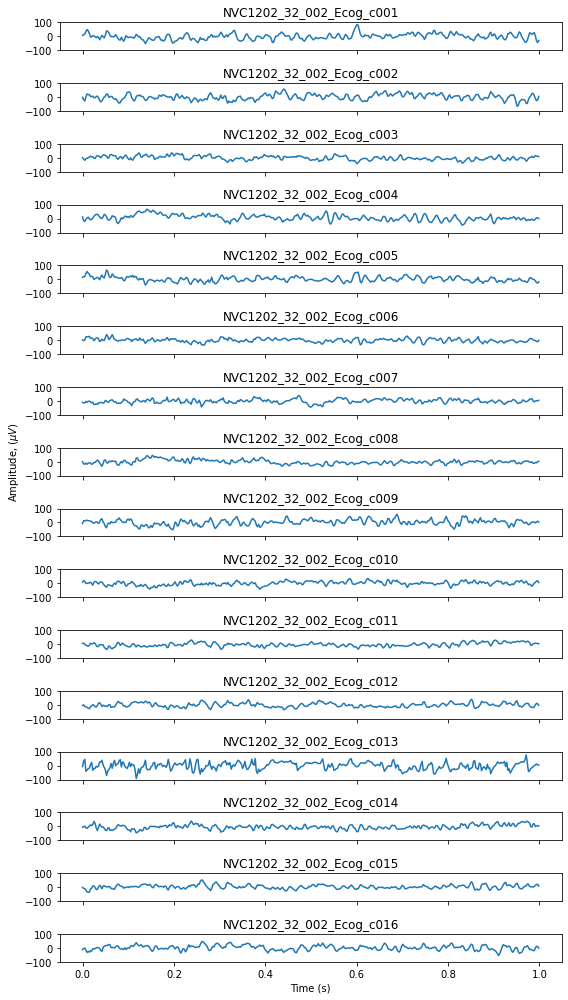

In [41]:
import numpy as np

filename = "Dog_1_preictal_segment_0001.mat"
path = ("/Volumes/LaCie/seizure-prediction/Dog_1/Dog_1/Dog_1_preictal_segment_0001.mat")
mat = sio.loadmat(path)

data = get_data(mat)
channels = get_channels(mat)
sampling_frequency = get_sampling_frequency(mat)

t = np.arange(0, np.rint(sampling_frequency).astype(int)) / sampling_frequency

horizontal_size = 8
vertical_size = 14
fig, axes = plt.subplots(figsize=(horizontal_size, vertical_size), nrows=16, ncols=1, sharex=True)
for i, ax in enumerate(axes):
    ax.plot(t, data[i,0:np.rint(sampling_frequency).astype(int)].T)
    ax.set_ylim([-100, 100])
    ax.title.set_text(channels[i].item())
plt.xlabel('Time (s)')
axes[7].set_ylabel('Amplitude, ($\mu V$)')
fig.tight_layout()
fig.savefig('/Volumes/LaCie/Dog_1_preictal_segment_0001.png')

Interictal Signal View 

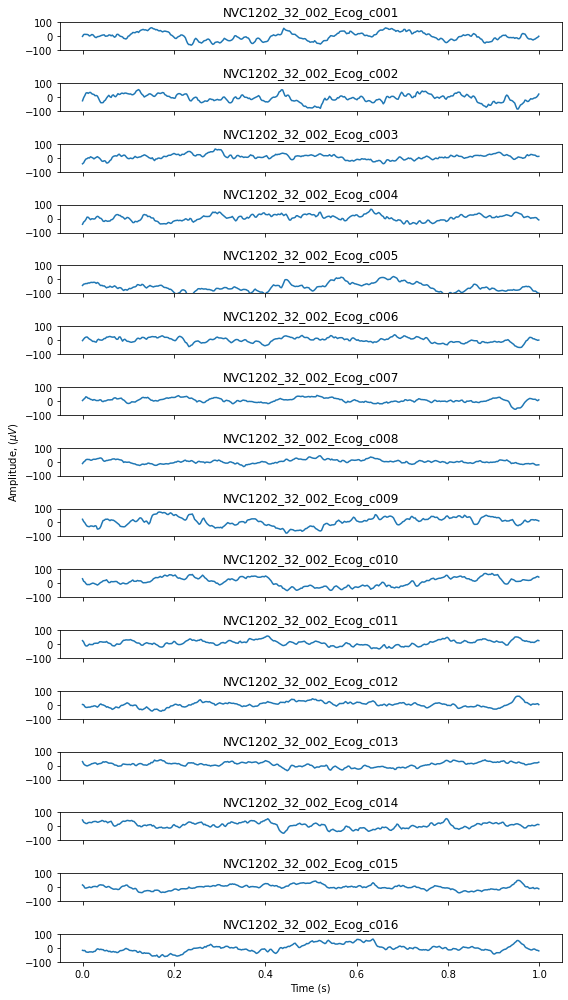

In [43]:
import numpy as np

filename = "Dog_1_interictal_segment_0001.mat"
path = ("/Volumes/LaCie/seizure-prediction/Dog_1/Dog_1/Dog_1_interictal_segment_0001.mat")
mat = sio.loadmat(path)

data = get_data(mat)
channels = get_channels(mat)
sampling_frequency = get_sampling_frequency(mat)

t = np.arange(0, np.rint(sampling_frequency).astype(int)) / sampling_frequency

horizontal_size = 8
vertical_size = 14
fig, axes = plt.subplots(figsize=(horizontal_size, vertical_size), nrows=16, ncols=1, sharex=True)
for i, ax in enumerate(axes):
    ax.plot(t, data[i,0:np.rint(sampling_frequency).astype(int)].T)
    ax.set_ylim([-100, 100])
    ax.title.set_text(channels[i].item())
plt.xlabel('Time (s)')
axes[7].set_ylabel('Amplitude, ($\mu V$)')
fig.tight_layout()
fig.savefig('/Volumes/LaCie/Dog_1_interictal_segment_0001.png')

In [44]:
from scipy.fft import rfft, rfftfreq

Performing FFT on the raw data and visualizing the power spectrum 

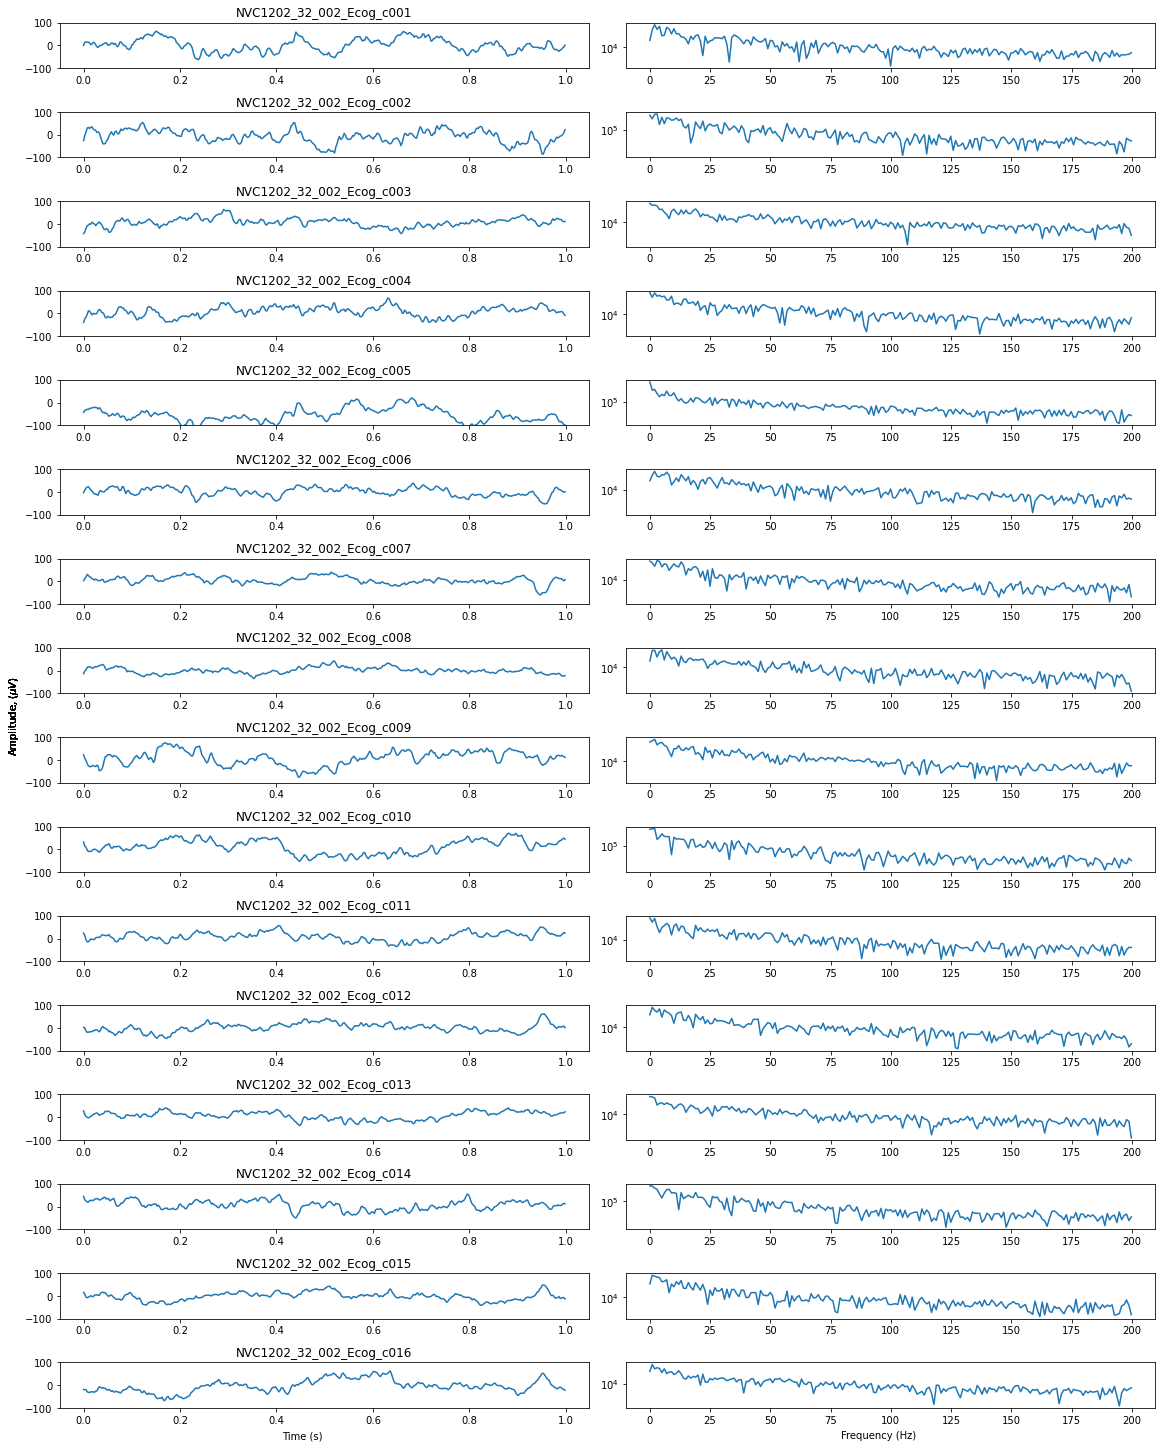

In [48]:
horizontal_size = 16
vertical_size = 20
fig, axes = plt.subplots(figsize=(horizontal_size, vertical_size), nrows=16, ncols=2)
for i, ax in enumerate(axes):
    # The raw EEg Signals 
    ax[0].plot(t, data[i,0:np.rint(sampling_frequency).astype(int)].T)
    ax[0].set_ylim([-100, 100])
    ax[0].title.set_text(channels[i].item())
    
    #  Perfomring FFT on 1s of the raw EEG signals:  
    sample_data = data[i,0:np.rint(sampling_frequency).astype(int)]
    fourier_transform = rfft(sample_data)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform) #power spectrum
    frequency = np.linspace(0, sampling_frequency/2, len(power_spectrum))
    
    #Visualize the power spectrum  
    ax[1].semilogy(frequency, power_spectrum) # y-axis is power, plotted on base-10 log scale
    ax[1].set_yscale('log')
    
    fig.text(0.0, 0.5, 'Amplitude, ($\mu V$)', ha='center', va='center', rotation='vertical')
fig.text(0.25, 0.00, 'Time (s)', ha='center', va='center')
fig.text(0.75, 0.00, 'Frequency (Hz)', ha='center', va='center')
fig.tight_layout()

fig.savefig('/Volumes/LaCie/Dog_1_interictal_segment_0001_powerlineexploration.png')

In [49]:
# using the Dog_1_interictal_segment_0001.mat extract 1 min block from 10 mins clip
n = np.rint(sampling_frequency).astype(int)*60
# the last channel: 
one_min_EEG = data[15,0:n] 
t = np.arange(0, n) / sampling_frequency

Spectrogram to view noise 

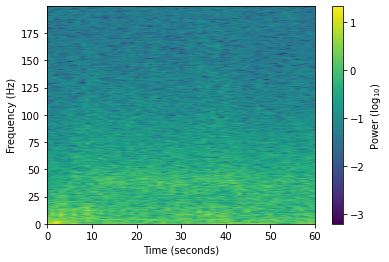

In [50]:
from scipy import signal
#time window in seconds 
timewindow = 2
timewindowidx = np.rint(timewindow/(1/sampling_frequency)).astype(int)
f, t, Zxx = signal.stft(one_min_EEG, fs=sampling_frequency, window='hann', nperseg=timewindowidx, 
                        noverlap=None, return_onesided=True)
fig, ax = plt.subplots()
mesh = ax.pcolormesh(t, f, np.log10(np.abs(Zxx)), shading='gouraud')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Frequency (Hz)')
cbar = fig.colorbar(mesh)
cbar.ax.set_ylabel('Power ($\log_{10}$)')
fig.savefig('/Volumes/LaCie/Dog_1_interictal_segment_0001_spectrogram.png')

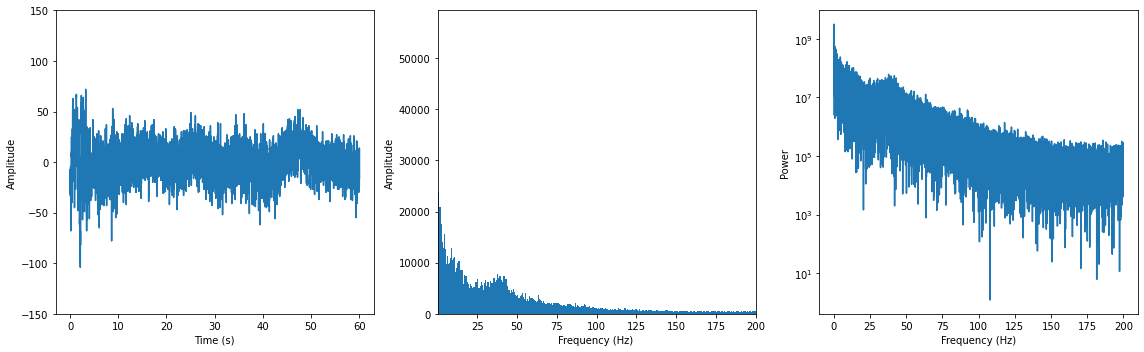

In [55]:
n = np.rint(sampling_frequency).astype(int)*60
one_min_EEG = data[15,0:n] 
t = np.arange(0, n) / sampling_frequency


fourier_ampl = np.abs(rfft(one_min_EEG))
fourier_powr = fourier_ampl**2
fourier_freq = rfftfreq(n, 1/sampling_frequency)

fig, ax = plt.subplots(figsize=(16,5), ncols=3)
ax[0].plot(t, one_min_EEG)
ax[0].set_ylim([-150, 150])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')

ax[1].bar(fourier_freq, fourier_ampl)
ax[1].set_xlim([0.1,200])
ax[1].set_xlabel('Frequency (Hz) ')
ax[1].set_ylabel('Amplitude')

ax[2].semilogy(fourier_freq, fourier_powr)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Power')

fig.tight_layout()
fig.savefig('/Volumes/LaCie/1mfft.png')


# Visualizing the six bands 

log(Total power): 23.990237719418772


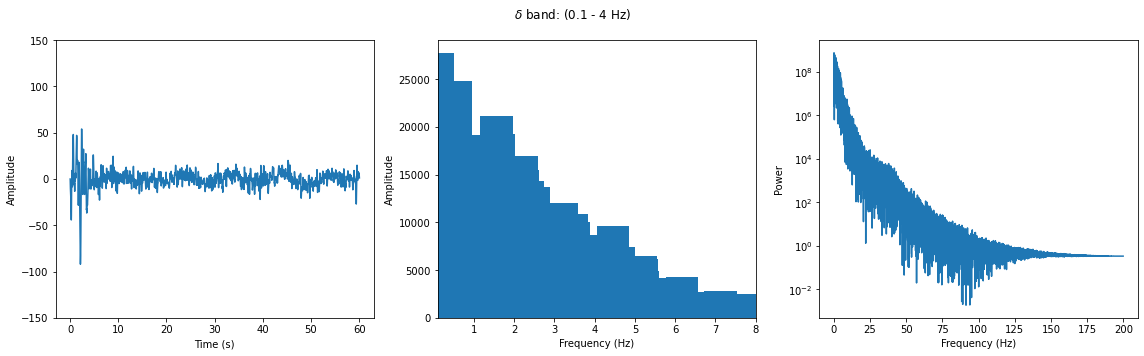

In [56]:
#delta band 
lo, hi = 0.1, 4

# normalise in range 0 - 1 where 1 is Nyquist frequency for later filtering 
nyquist = 0.5 * sampling_frequency
lo = lo/nyquist
hi = hi/nyquist

order = 2 # for bandpass filter
b, a = signal.butter(order, [lo, hi], btype='bandpass') # filter slection 
y = signal.lfilter(b, a, one_min_EEG) # filter the signals 

#  FFT on the singnals that have been filtered
fourier_ampl = np.abs(rfft(y))
fourier_powr = fourier_ampl**2
fourier_freq = rfftfreq(n, 1/sampling_frequency)

fig, ax = plt.subplots(figsize=(16,5), ncols=3)
ax[0].plot(t, y)
ax[0].set_ylim([-150, 150])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')

ax[1].bar(fourier_freq, fourier_ampl)
ax[1].set_xlim([0.1,8])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')

ax[2].semilogy(fourier_freq, fourier_powr)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Power')

plt.suptitle(r'$\delta$ band: (0.1 - 4 Hz)')
plt.tight_layout()
fig.savefig('/Volumes/LaCie/deltabands.png')

print('log(Total power):', np.log(np.sum(fourier_powr)))

The filter : bandpass filtering 

In [58]:
def bandpass_filter(X, fs, low, high, order=2):
    "The bandpass filtered signal."
    nyquist = 0.5 * fs
    low = low/nyquist
    high = high/nyquist
    b, a = signal.butter(order, [low, high], btype='bandpass')
    y = signal.lfilter(b, a, X)
    return y

log(Total power): 22.978433644175247


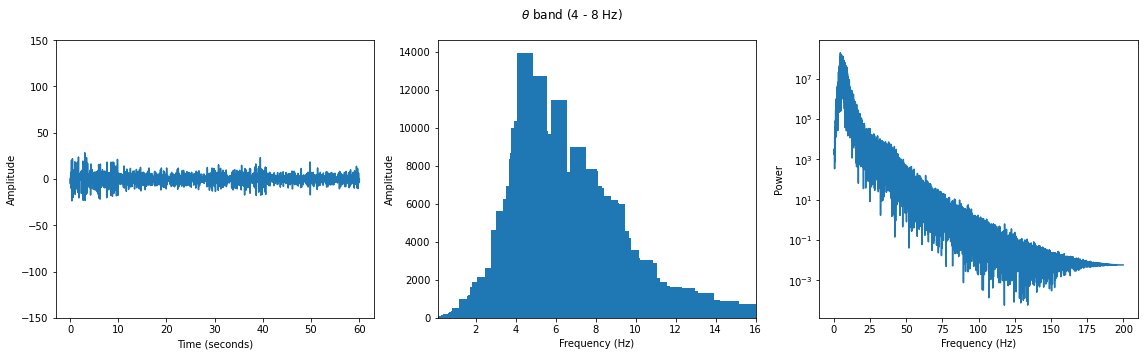

In [60]:
# theta band
y = bandpass_filter(one_min_EEG, sampling_frequency, low=4, high=8)

fourier_ampl = np.abs(rfft(y))
fourier_powr = fourier_ampl**2
fourier_freq = rfftfreq(n, 1/sampling_frequency)

fig, ax = plt.subplots(figsize=(16,5), ncols=3)
ax[0].plot(t, y)
ax[0].set_ylim([-150, 150])
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Amplitude')

ax[1].bar(fourier_freq, fourier_ampl)
ax[1].set_xlim([0.1,16])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')

ax[2].semilogy(fourier_freq, fourier_powr)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Power')

plt.suptitle(r'$\theta$ band (4 - 8 Hz)')
plt.tight_layout()
fig.savefig('/Volumes/LaCie/thetabands.png')

print('log(Total power):', np.log(np.sum(fourier_powr)))

log(Total power): 22.788036686620906


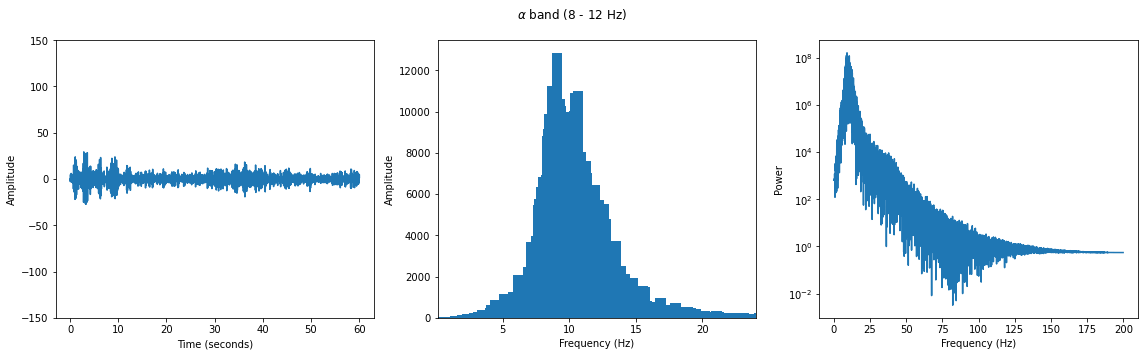

In [62]:
# alpha band
y = bandpass_filter(one_min_EEG, sampling_frequency, low=8, high=12)

fourier_ampl = np.abs(rfft(y))
fourier_powr = fourier_ampl**2
fourier_freq = rfftfreq(n, 1/sampling_frequency)

fig, ax = plt.subplots(figsize=(16,5), ncols=3)
ax[0].plot(t, y)
ax[0].set_ylim([-150, 150])
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Amplitude')

ax[1].bar(fourier_freq, fourier_ampl)
ax[1].set_xlim([0.1,24])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')

ax[2].semilogy(fourier_freq, fourier_powr)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Power')

plt.suptitle(r'$\alpha$ band (8 - 12 Hz)')
plt.tight_layout()
fig.savefig('/Volumes/LaCie/alpha bands.png')

print('log(Total power):', np.log(np.sum(fourier_powr)))

log(Total power): 23.31024822935132


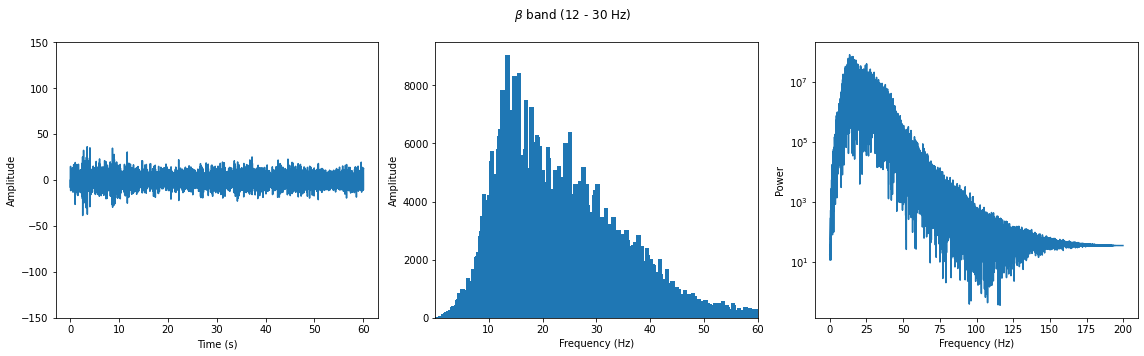

In [63]:
# beta band
y = bandpass_filter(one_min_EEG, sampling_frequency, low=12, high=30)

fourier_ampl = np.abs(rfft(y))
fourier_powr = fourier_ampl**2
fourier_freq = rfftfreq(n, 1/sampling_frequency)

fig, ax = plt.subplots(figsize=(16,5), ncols=3)
ax[0].plot(t, y)
ax[0].set_ylim([-150, 150])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')

ax[1].bar(fourier_freq, fourier_ampl)
ax[1].set_xlim([0.1,60])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')

ax[2].semilogy(fourier_freq, fourier_powr)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Power')

plt.suptitle(r'$\beta$ band (12 - 30 Hz)')
plt.tight_layout()
fig.savefig('/Volumes/LaCie/betabands.png')

print('log(Total power):', np.log(np.sum(fourier_powr)))

log(Total power): 23.24768860643544


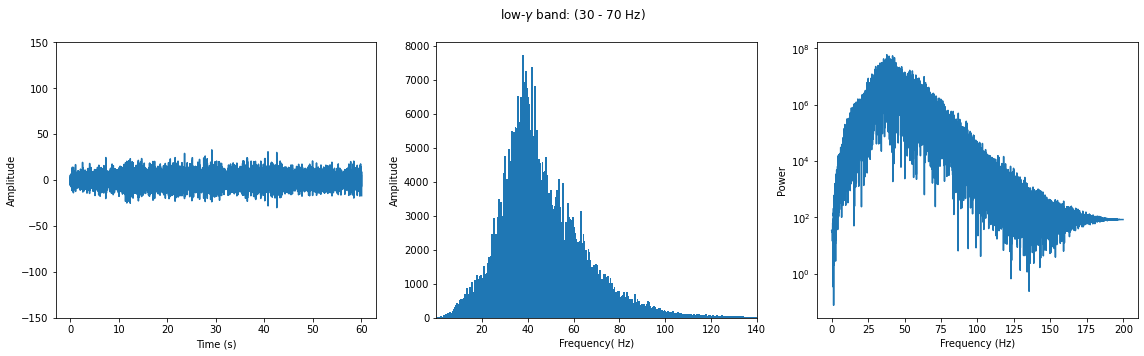

In [64]:
# low-gamma band
y = bandpass_filter(one_min_EEG, sampling_frequency, low=30, high=70)

fourier_ampl = np.abs(rfft(y))
fourier_powr = fourier_ampl**2
fourier_freq = rfftfreq(n, 1/sampling_frequency)

fig, ax = plt.subplots(figsize=(16,5), ncols=3)
ax[0].plot(t, y)
ax[0].set_ylim([-150, 150])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')

ax[1].bar(fourier_freq, fourier_ampl)
ax[1].set_xlim([0.1,140])
ax[1].set_xlabel('Frequency( Hz)')
ax[1].set_ylabel('Amplitude')

ax[2].semilogy(fourier_freq, fourier_powr)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Power')

plt.suptitle(r'low-$\gamma$ band: (30 - 70 Hz)')
plt.tight_layout()

fig.savefig('/Volumes/LaCie/lowbands.png')

print('log(Total power):', np.log(np.sum(fourier_powr)))

log(Total power): 21.6625288498886


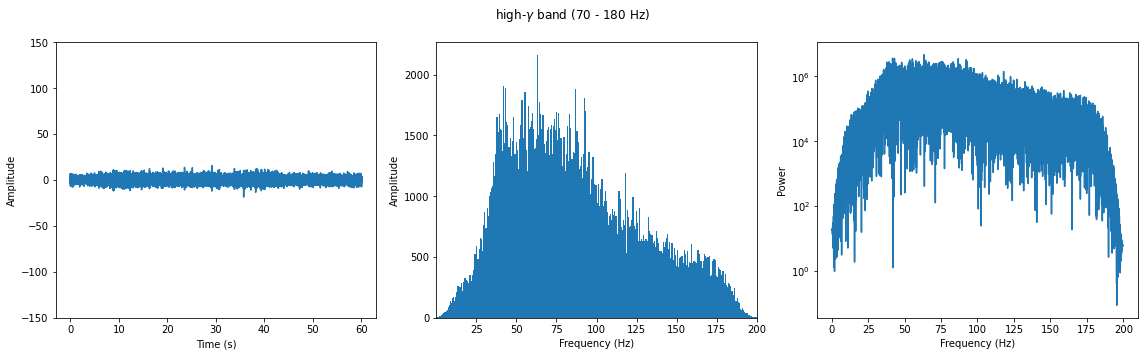

In [65]:
# high-gamma band
y = bandpass_filter(one_min_EEG, sampling_frequency, low=70, high=180)

fourier_ampl = np.abs(rfft(y))
fourier_powr = fourier_ampl**2
fourier_freq = rfftfreq(n, 1/sampling_frequency)

fig, ax = plt.subplots(figsize=(16,5), ncols=3)
ax[0].plot(t, y)
ax[0].set_ylim([-150, 150])
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')

ax[1].bar(fourier_freq, fourier_ampl)
ax[1].set_xlim([0.1,200])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')

ax[2].semilogy(fourier_freq, fourier_powr)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Power')

plt.suptitle(r'high-$\gamma$ band (70 - 180 Hz)')
plt.tight_layout()

fig.savefig('/Volumes/LaCie/highbands.png')

print('log(Total power):', np.log(np.sum(fourier_powr)))

In [66]:
#interictal
filename = "Dog_1_interictal_segment_0001.mat"
path = ("/Volumes/LaCie/seizure-prediction/Dog_1/Dog_1/Dog_1_interictal_segment_0001.mat")
mat = sio.loadmat(path)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 21 01:00:00 2014',
 '__version__': '1.0',
 '__globals__': [],
 'interictal_segment_1': array([[(array([[  0,  13,  15, ..., -25, -21, -12],
                [-26,  -4,  11, ..., -39, -32, -21],
                [-42, -35, -19, ..., -16, -16, -18],
                ...,
                [ 45,  30,  25, ...,  43,  28,  17],
                [ 15,   8,  -6, ...,  14,  13,   6],
                [-18, -20, -19, ...,   9,   9,   3]], dtype=int16), array([[600]], dtype=uint16), array([[399.6097561]]), array([[array(['NVC1202_32_002_Ecog_c001'], dtype='<U24'),
                 array(['NVC1202_32_002_Ecog_c002'], dtype='<U24'),
                 array(['NVC1202_32_002_Ecog_c003'], dtype='<U24'),
                 array(['NVC1202_32_002_Ecog_c004'], dtype='<U24'),
                 array(['NVC1202_32_002_Ecog_c005'], dtype='<U24'),
                 array(['NVC1202_32_002_Ecog_c006'], dtype='<U24'),
                 array(['NVC12

In [68]:
data = get_data(mat)
channels =get_channels(mat)
sampling_frequency = get_sampling_frequency(mat)
t = np.arange(0, np.rint(sampling_frequency).astype(int)) / sampling_frequency

Upper and Lower bound of the Window 

In [75]:
def roll(X, fs, n_interval, len_interval):
    snaps = []
    for i in range(n_interval):
        # upper bound
        n = np.rint(fs).astype(int)*len_interval*(i+1)
        #lowerbound
        n_1 = n - np.rint(fs).astype(int)*len_interval 
        snaps.append(X[n_1:n])
    return snaps

In [77]:
#Print the results 
for i in range(10 + 1):
    print('seconds:', 60*i)
    n = np.rint(sampling_frequency).astype(int)*60*(i+1) # UB
    n_1 = n - np.rint(sampling_frequency).astype(int)*60 # 1 min behind (LB)
    print('Lower bound:', n_1)
    print('Upper Bound:', n)
    print('*******')

seconds: 0
Lower bound: 0
Upper Bound: 24000
*******
seconds: 60
Lower bound: 24000
Upper Bound: 48000
*******
seconds: 120
Lower bound: 48000
Upper Bound: 72000
*******
seconds: 180
Lower bound: 72000
Upper Bound: 96000
*******
seconds: 240
Lower bound: 96000
Upper Bound: 120000
*******
seconds: 300
Lower bound: 120000
Upper Bound: 144000
*******
seconds: 360
Lower bound: 144000
Upper Bound: 168000
*******
seconds: 420
Lower bound: 168000
Upper Bound: 192000
*******
seconds: 480
Lower bound: 192000
Upper Bound: 216000
*******
seconds: 540
Lower bound: 216000
Upper Bound: 240000
*******
seconds: 600
Lower bound: 240000
Upper Bound: 264000
*******


In [78]:
n = np.rint(sampling_frequency).astype(int)*60
n_1 = n - n
one_min_EEG = data[15,0:n] #  0-60s
t = np.arange(0, n) / sampling_frequency

(24000,)

Decision for filtering : 

In [80]:
# EGG Band selection 
bandpassfilter_Egg = {'Delta': (0.1, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Low Gamma': (30,70),
             'High Gamma': (70, 180)}